In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from get_plot import get_plot
from scipy import sparse


coords = json.load(open('coords.json'))
mpl.rcParams['figure.dpi'] = 120
# mpl.rcParams['savefig.pad_inches'] = 0


# This code is processed 
# I have manually processed every file using this format

In [4]:
gdf = gpd.read_file("D:/Users/xubil/OneDrive/Documents/Wildfires Data/canards_sauv_mhnb_2008_s_poly/canards_sauv_mhnb_2008_s_poly.shp")

In [13]:
gdf.keys()

Index(['objectid', 'uid', 'name', 'type', 'lcoation', 'num_lines', 'municipal',
       'prov', 'longitude', 'latitude', 'begelev', 'endelev', 'accuracy',
       'acq_tech', 'valdate', 'provider', 'shape_leng', 'dat_acqui',
       'dat_charg', 'oid', 'geometry'],
      dtype='object')

In [15]:
gdf

,objectid,uid,name,type,lcoation,num_lines,municipal,prov,longitude,latitude,...,endelev,accuracy,acq_tech,valdate,provider,shape_leng,dat_acqui,dat_charg,oid,geometry
0,1,CC97A778-FBCC-416A-A93B-3DED797C6625,TRANSMISSION LINE,POWER,OVERHEAD,1.0,BRAZEAU COUNTY,AB,-115.266581,52.843166,...,1013.982,18,-1,1979,2,0.243495,20211112000000,20211209000000,1,"LINESTRING (-12843085.500 6966749.631, -128414..."
1,2,2E7FC385-08A9-452A-8AD9-7B4836EE629A,TRANSMISSION LINE,POWER,OVERHEAD,1.0,BRAZEAU COUNTY,AB,-115.389271,52.880532,...,879.266,18,-1,1979,2,0.070751,20211112000000,20211209000000,2,"LINESTRING (-12845654.140 6955112.693, -128457..."
2,3,CB918FE7-E883-4DF5-85A2-E81AE6A3E41F,TRANSMISSION LINE,POWER,OVERHEAD,1.0,O'CHIESE 203,AB,-115.372645,52.831750,...,944.015,18,-1,1979,2,0.042648,20211112000000,20211209000000,3,"LINESTRING (-12845104.389 6954358.400, -128430..."
3,4,99A23A08-EC74-4D48-B6A7-13BD850CEC04,TRANSMISSION LINE,POWER,OVERHEAD,1.0,WESTLOCK COUNTY,AB,-113.899677,54.392348,...,621.004,17,-1,1989,2,0.320833,20211112000000,20211209000000,4,"LINESTRING (-12690423.647 7263979.172, -126886..."
4,5,E61940EB-40D6-4C98-924C-EF21D2962428,TRANSMISSION LINE,POWER,OVERHEAD,1.0,WESTLOCK COUNTY,AB,-113.576519,54.291121,...,646.996,17,-1,1989,2,0.090798,20211112000000,20211209000000,5,"LINESTRING (-12643239.524 7217647.544, -126432..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13141,13142,593C0797-0D3B-42E2-99B1-949EF0E7A838,TRANSMISSION LINE,TELEPHONE OTHER,UNKNOWN,1.0,"YUKON, UNORGANIZED",YT,-135.425718,61.989270,...,579.008,26,-1,1986,2,0.150999,20211112000000,20211209000000,13142,"LINESTRING (-15083180.407 8859143.762, -150825..."
13142,13143,493D9D53-DB6C-4DAE-BB63-AA6BAC6376BF,TRANSMISSION LINE,TELEPHONE OTHER,UNKNOWN,1.0,"YUKON, UNORGANIZED",YT,-135.148843,61.931286,...,583.421,26,-1,1986,2,0.293527,20211112000000,20211209000000,13143,"LINESTRING (-15059431.201 8851644.535, -150593..."
13143,13144,B8D3C84D-9D22-49D4-ABBA-D660CB07E47A,TRANSMISSION LINE,TELEPHONE OTHER,UNKNOWN,1.0,"YUKON, UNORGANIZED",YT,-139.715289,63.896143,...,332.921,28,-1,1986,2,0.278592,20211112000000,20211209000000,13144,"LINESTRING (-15554694.606 9295298.594, -155547..."
13144,13145,CBAF2E57-DEEF-4B32-877C-D0B688EBD081,TRANSMISSION LINE,TELEPHONE OTHER,UNKNOWN,1.0,"YUKON, UNORGANIZED",YT,-139.712021,63.766005,...,346.133,28,-1,1986,2,0.044169,20211112000000,20211209000000,13145,"LINESTRING (-15554544.335 9294454.094, -155544..."


Processing item  POWER
Processing item  TELEPHONE OTHER


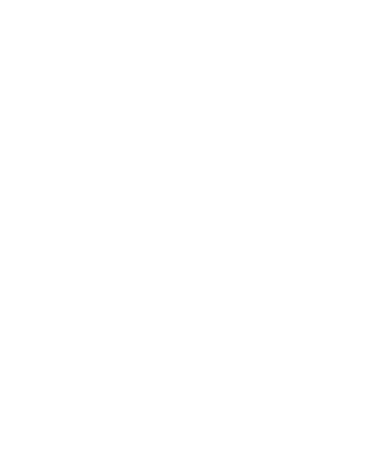

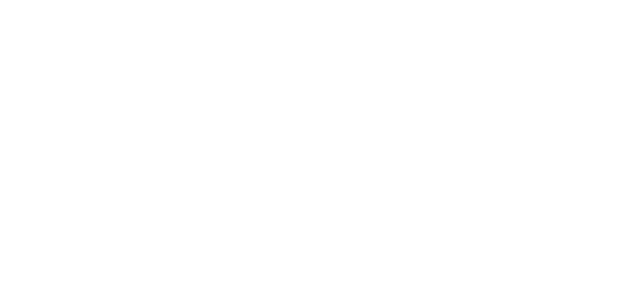

In [16]:
plots,titles = get_plot(gdf, "type", "white")

In [10]:
xmin, xmax, ymin, ymax = (coords["limits"]["xmin"]), (coords["limits"]["xmax"]), (coords["limits"]["ymin"]), (coords["limits"]["ymax"])

# Matrix Size:
# Limits: [108:472, 95:692]

# y length
ylen = 472-108

# x length
xlen = 692-95

In [11]:
from shapely.geometry import Point

d = {'col1': ['name1', 'name2'], 'geometry': [Point(xmin, ymin), Point(xmax, ymax)]}
gdf2 = gpd.GeoDataFrame(d, crs=3857)

In [12]:
gdf2

,col1,geometry
0,name1,POINT (-8953229.451 5559313.032)
1,name2,POINT (-6750696.015 6900707.257)


In [13]:
gdf3 = gdf2.to_crs(4326)

In [14]:
gdf3 

,col1,geometry
0,name1,POINT (-80.42823 44.60349)
1,name2,POINT (-60.64253 52.55283)


In [18]:
plots[2][0]

IndexError: list index out of range

In [20]:
split = 5
cur_plot = 2

final_mat = []

for main_idx in range(len(plots)):

    final_mat_it = sparse.csr_matrix(np.empty((0, xlen*split)))

    for iy in range(split):

        new_row = sparse.csr_matrix(np.empty((ylen, 0)))

        for ix in range(split):
            plots[main_idx][1].axis([
                xmin+(((xmax-xmin)/split)*ix), 
                xmin+(((xmax-xmin)/split)*(ix+1)),
                ymin+(((ymax-ymin)/split)*iy),
                ymin+(((ymax-ymin)/split)*(iy+1)),
            ])


            plots[main_idx][0].canvas.draw()

            X = np.array(plots[main_idx][0].canvas.renderer.buffer_rgba())
            X_final = np.zeros((len(X), len(X[0])))

            # convert matrix to a 0-1 scale to save space
            print(ix, iy)

            for row in range(len(X)):
                for col in range(len(X[row])):
                    X_final[row][col] = (float(X[row][col][3]))/255.0
            X_final = X_final[108:472, 95:692]
            

            # figx, axX = plt.subplots()
            # axX.set_title("x"+str(ix)+"y"+str(iy))
            # axX.matshow(X_final)

            new_row = sparse.hstack((new_row, sparse.csr_matrix(X_final)))
            del X_final
            # plt.close(figx)
        
        # print(new_row)

        final_mat_it = sparse.vstack((new_row, final_mat_it))
        del new_row

    sparse.save_npz("../data_new/"+titles[main_idx]+".npz", final_mat_it)

    del final_mat_it

    # figx, axX = plt.subplots()
    # axX.set_title(titles[main_idx])
    # axX.matshow(final_mat_it)

    # final_mat.append(final_mat_it)

0 0
1 0
2 0
3 0
4 0
0 1
1 1
2 1
3 1


KeyboardInterrupt: 

#### Convert to Sparse Matrix

MemoryError: Unable to allocate 16.2 GiB for an array with shape (36400, 59700) and data type float64

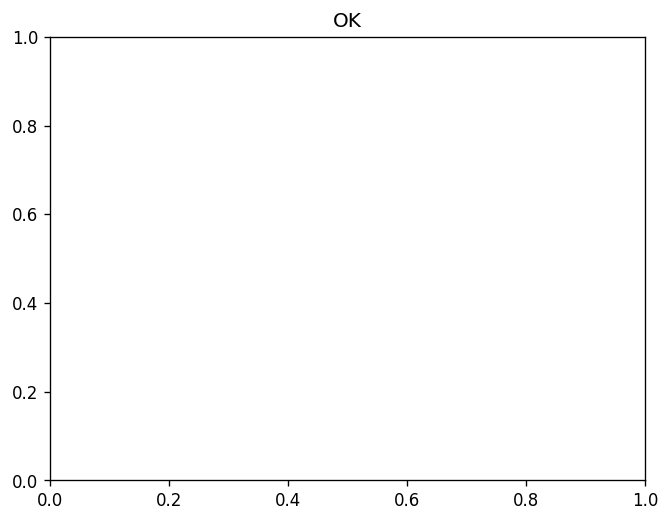

In [4]:
data = sparse.load_npz("../data_new/Herbaçaie.npz")

figx, axX = plt.subplots()
axX.set_title("OK")
mat = data.toarray()
axX.matshow(data.toarray())

In [16]:
for i in range(len(final_mat)):
    sparse.save_npz("../data_new/"+titles[i]+".npz", final_mat[i])


In [ ]:
sfinal_mat_it